<h1 style="color:rgb(0,120,170)">Neural Networks and a Glimpse at Pytorch </h1>

<h2 style="color:rgb(0,120,170)">Task 1: The XOR Problem</h2>

**Task 1.1.**

In this task we try to formalize the fact that a single layer neural network (NN) cannot solve the XOR problem, but a two layer network can. 

Let us assume that we only have four possible inputs $\mathbf{x}_1 = (0,0)$,
$\mathbf{x}_2 = (1,0)$, $\mathbf{x}_3 = (0,1)$, and $\mathbf{x}_4 = (1,1)$ with the following labels $y_1=0$, $y_2=1$, $y_3=1$, and $y_4=0$, respectively. Note that this exactly describes the XOR function: it outputs 1 (=true) if and only if exactly one of the input components equals 1 (=true).

* As a first task show that if we use a linear network
$
    g_1(\mathbf{x};\mathbf{w})= \mathbf{x} \cdot \mathbf{w} = x^{(1)} w_1 + x^{(2)}  w_2,
$
 it is impossible to find parameters $w_1$ and $w_2$
  that solve this problem exactly.
  
**Please provide reasoning and explanations in full sentences. Grading of the task will heavily depend on it.**

<h3 style="color:rgb(210,90,80)">Calculation (10 points):</h3>

Inputs:

$
x_1 = (0,0), \quad y_1 = 0\\
x_2 = (1,0), \quad  y_2 = 1 \\
x_3 = (0,1), \quad  y_3 = 1 \\
x_4 = (1,1), \quad  y_4 = 0 \\
$


Defintion of our model: $g_1(x;w) = x^1 w_1 + x^2  w_2 $:

$
\quad  x \cdot w = g_1(x;w)\\
\quad 0 \cdot w_1 + 0 \cdot w_2= 0, \qquad \text{trivial case}\\
\quad 1 \cdot w_1 + 0 \cdot w_2= 1, \qquad \rightarrow w_1 = 1\\
\quad 0 \cdot w_1 + 1 \cdot w_2= 1, \qquad \rightarrow w_2 = 1\\
\quad 1 \cdot w_1 + 1 \cdot w_2= 0, \qquad \rightarrow \text{Contradiction } \\
$

Therefore, no linear solution

**Task 1.2.**

Even by adding bias units or by applying a sigmoid, the problem cannot be solved. 

However, as soon as we use a two-layer network with a simple non-linear activation function (ReLU):

$$   
g_2(\mathbf{x};\mathbf{W}^{[1]}, \mathbf{W}^{[2]}, \mathbf{b})=  \mathbf{W}^{[2]T} \max(0,\mathbf{W}^{[1]} \mathbf{x} + \mathbf{b}),
$$

we can find parameters, that solve the problem. 
   * Precisely, show that $\mathbf{W}^{[1]}=\begin{pmatrix} 1 & 1 \\ 1 & 1 \end{pmatrix}$,
    $\mathbf{b}=\begin{pmatrix} 0 \\ -1 \end{pmatrix}$, and $\mathbf{W}^{[2]}=\begin{pmatrix} 1 \\ -2 \end{pmatrix}$ solve the problem
    in an exact way. The transformation $\max(0,\mathbf{W}^{[1]} \mathbf{x} + \mathbf{b})$ has 
    mapped the points $ \mathbf{x}_1,\ldots,  \mathbf{x}_4$ into a space, in which those data points are 
    linearly separable. 
    
**Please provide reasoning and explanations in full sentences. Grading of the task will heavily depend on it.**

<h3 style="color:rgb(210,90,80)">Calculation (15 points):</h3>

If we take for instance $\mathbf{x}_2^T = (1,0)$ and plug it into the two-layer network, we get:

$$ g_2(\mathbf{x}_2;\mathbf{W}^{[1]}, \mathbf{W}^{[2]}, \mathbf{b})=  \mathbf{W}^{[2]T} \max(0,\mathbf{W}^{[1]} \mathbf{x}_2 + \mathbf{b}) $$

$$ = \begin{pmatrix} 1 & -2 \end{pmatrix} \max \left(0, \begin{pmatrix} 1 & 1 \\ 1 & 1 \end{pmatrix} \begin{pmatrix} 1 \\ 0
\end{pmatrix} + \begin{pmatrix} 0 \\ -1 \end{pmatrix} \right)$$

$$ = \begin{pmatrix} 1 & -2 \end{pmatrix} \max \left(0, \begin{pmatrix} 1 \\ 1 \end{pmatrix} + \begin{pmatrix} 0 \\ -1 \end{pmatrix}\right)$$

$$ = \begin{pmatrix} 1 & -2 \end{pmatrix} \max \left(0, \begin{pmatrix} 1 \\ 0 \end{pmatrix} \right)$$

$$ = \begin{pmatrix} 1 & -2 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = 1$$

Similarly for $\mathbf{x}_1, \mathbf{x}_3, \mathbf{x}_4$, the nonlinear transformation makes the points linearly separable.

<h2 style="color:rgb(0,120,170)">Task 2: Backprop of a Simple NN</h2>

Consider the following neural network (we try to adapt to the notation from the lecture):
<div>
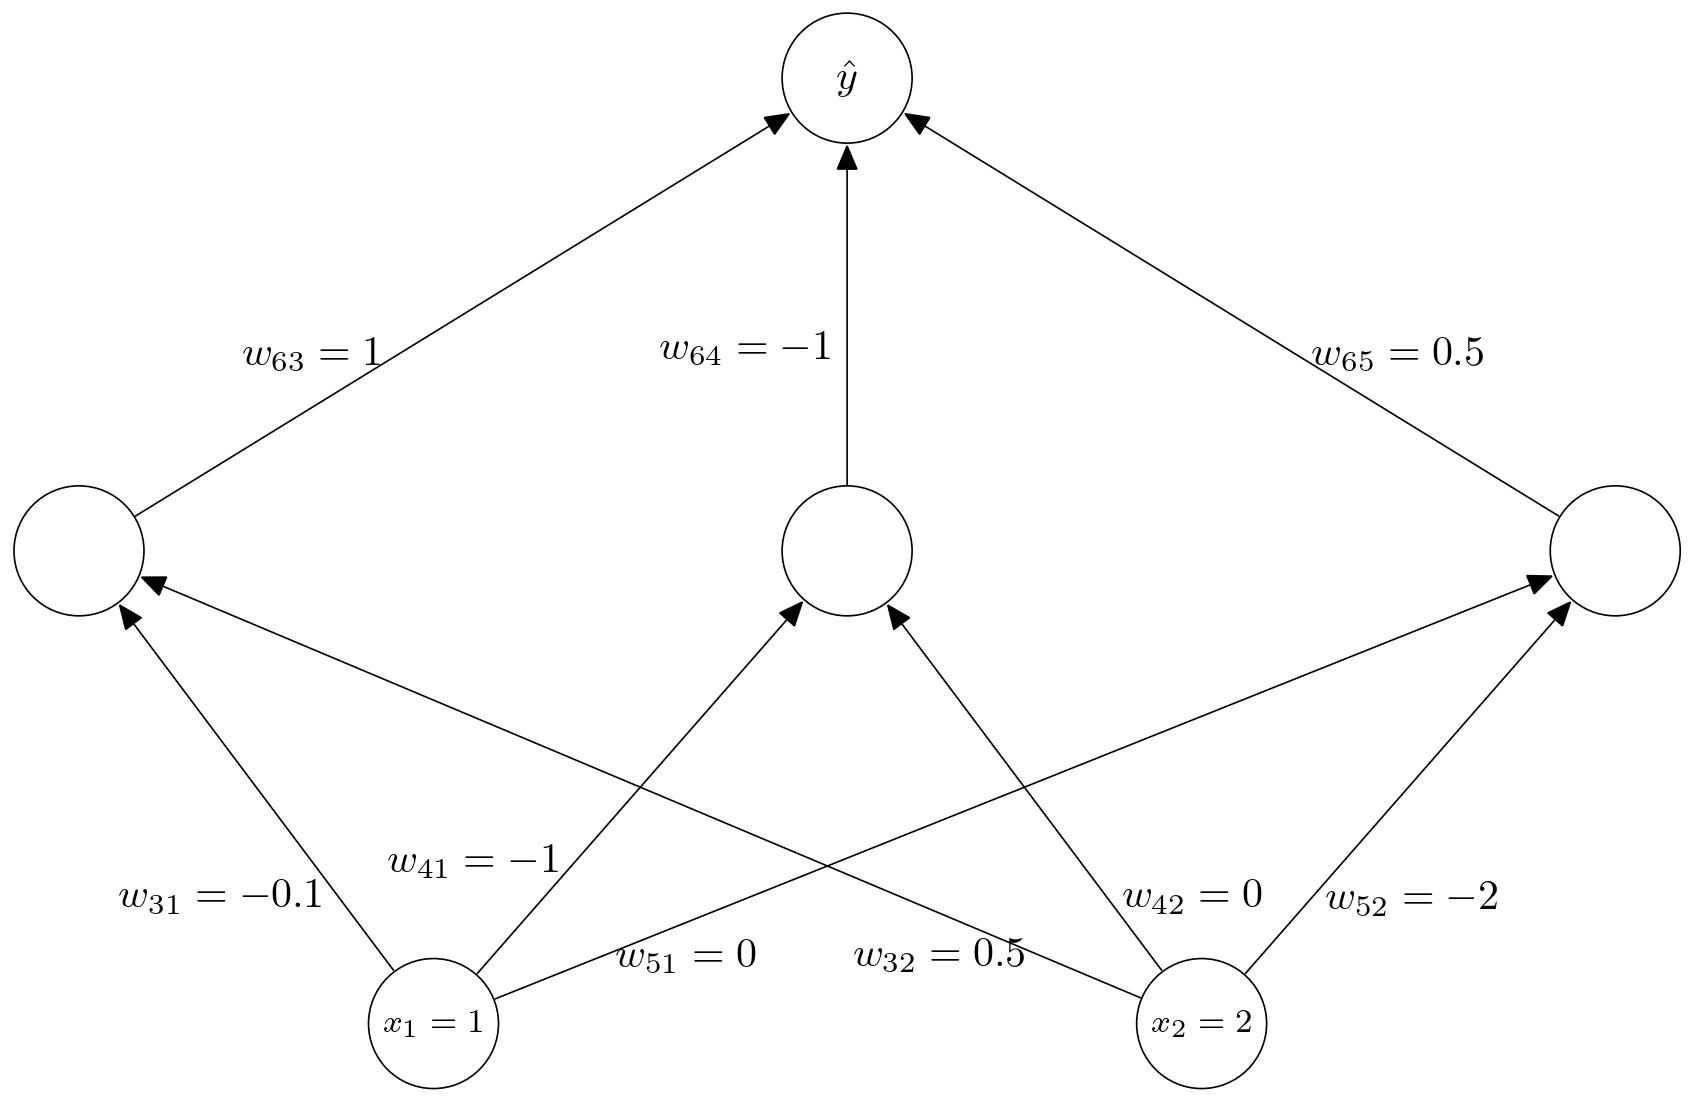
</div>
The preactivations of the hidden units are denoted as $s_3$, $s_4$ and $s_5$  from left to right, their activations as $a_3$, $a_4$ and $a_5$, respectively. In the hidden layer we use ReLU as activation function, i.e. $f_3(x)=f_4(x)=f_5(x)=\text{ReLU}(x)$, and in the output layer the activation is the identity function. The preactivation of the output layer is denoted as $s_6$ and the output as $\hat{y}$. The delta at the output is denoted as $\delta_6$, and the hidden deltas as $\delta_3$, $\delta_4$ and $\delta_5$ from left to right, respectively. The true label is $y=1$ and as loss function we use the mean-squared loss, i.e $L(y,\hat{y})=\frac12 (y-\hat{y})^2$.
* Compute all outputs, preactivations, activations, and delta errors! Also compute $\frac{\partial L}{\partial w_{32}}$. Write down formulas (not only the numerical result) that indicate your computations at least for $s_3$, $\delta_3$ and $\frac{\partial L}{\partial w_{32}}$.

**Please provide reasoning and explanations in full sentences. Grading of the task will heavily depend on it.**

<h3 style="color:rgb(210,90,80)">Calculation (25 points):</h3>

<h3 style="color:rgb(210,90,80)">Calculation (25 points):</h3>

For the forward pass:
* $s_3 = w_{31} x_1 + w_{32}x_{2} = -0.1*1 + 0.5*2 = 0.9 \hspace{1cm}\Longrightarrow f_3(x) = 0.9$ 

* $s_4 = w_{41} x_1 + w_{42}x_{2} = -1*1 + 0*2 = -1 \hspace{1.7cm}\Longrightarrow f_4(x) = 0$

* $s_5 = w_{51} x_1 + w_{52}x_{2} = 0*1 + -2*2 = -4 \hspace{1.7cm}\Longrightarrow f_5(x) = 0$


* $s_6 = w_{63} f_3(x) + w_{64} f_4(x) + w_{65} f_5(x) =1*0.9 + -1*0 + 0.5*0 = 0.9 \hspace{0.7cm}\Longrightarrow \hat{y}=I(s_6)=0.9$


* $L(y,\hat{y})=\frac12 (\hat{y} - y)^2 = \frac12 (0.9 - 1)^2 =\frac{1}{200}$

For the backward pas:
$$\bullet\hspace{0.2cm}\delta_6 = \frac{\partial{L}}{\partial{s_6}} = \frac{\partial{L}}{\partial{\hat{y}}} \frac{\partial{\hat{y}}}{\partial{s_6}} = (\hat{y} - y)*1 = -0.1$$

$$\bullet\hspace{0.2cm}\delta_{3,4,5} = \frac{\partial{L}}{\partial{s_{3,4,5}}} = \frac{\partial{L}}{\partial{\hat{y}}} \frac{\partial{\hat{y}}}{\partial{s_6}} \frac{\partial{s_6}}{\partial{f_{3,4,5}(x)}} \frac{\partial{f_{3,4,5}(x)}}{\partial{s_{3,4,5}}} = (\hat{y}-y)*1*w_{63,64,65}*\begin{cases}0,& \text{if } f_{3,4,5}(x) = 0 \\1, & \text{if } f_{3,4,5}(x) = s_{3,4,5}
\end{cases}$$


Substituting in the equation, we can find that: $\delta_3 = -0.1\text{, } \delta_4 = 0 \text{, and } \delta_5 = 0$.
Last but not least: $\frac{\partial L}{\partial w_{32}} = \delta_3 \frac{\partial{s_3}}{\partial{w_{32}}} = \delta_3 x_2 = -0.2$

<h2 style="color:rgb(0,120,170)">Task 2: Pytorch and a Visualization of the Vanishing Gradient Problem</h2>

The aim of this task is to provide you with some familiarity with Pytorch, a Python-package which is nowadays heavily used for tasks that involve computations with neural networks. It has the nice feature that it incorporates automatic differentiation, so that you don't have to implement the backward pass for a NN any more. It also allows for transferring more involved experiments to GPUs easily, however, we won't need this nice feature here. We will again work with the Fashion MNIST data set, but this time we provide you with a Pytorch routine that can download it for you and even transforms it appropriately.

* Your first task will be to just let the code run and plot some images. To this end you will need to install Pytorch appropriately in your Python library!

<h3 style="color:rgb(208,90,80)">Code (10 points)</h3>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
from torchvision import datasets, transforms
from types import SimpleNamespace
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# Here we collect the hyperparameters we are going to use
args = SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=1,
                       lr=0.01, momentum=0.5, seed=1, log_interval=100)
torch.manual_seed(args.seed)
use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

In [3]:
#just printout for deeper view
print(args)
print(device)

namespace(batch_size=64, epochs=1, log_interval=100, lr=0.01, momentum=0.5, seed=1, test_batch_size=1000)
cpu


In [4]:
# Data loader (downloads data automatically the first time)
# 0.1307 and 0.3081 are the mean and the std computed on the training set
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST(os.path.join('.','..','data'), train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=args.batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST(os.path.join('.','..','data'), train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
        batch_size=args.test_batch_size, shuffle=True, **kwargs)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting .\..\data\FashionMNIST\raw\train-images-idx3-ubyte.gz to .\..\data\FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting .\..\data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to .\..\data\FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting .\..\data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to .\..\data\FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting .\..\data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to .\..\data\FashionMNIST\raw

Processing...
Done!


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\torchvision\datasets\mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


torch.Size([60000])
torch.Size([60000, 28, 28])
Input dimension is 784.


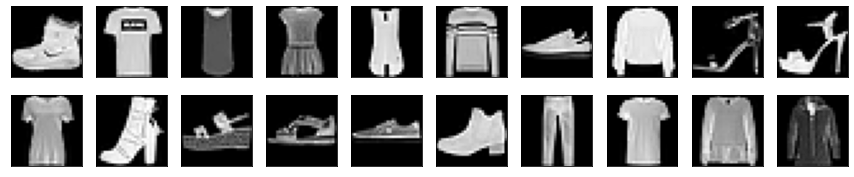

In [5]:
print(train_loader.dataset.targets.shape)
print(train_loader.dataset.data.shape)
input_dim = train_loader.dataset.data.shape[1]*train_loader.dataset.data.shape[2]
print("Input dimension is {}.".format(input_dim))
output_dim = 10

# Plot example images
fig=plt.figure(figsize=(15,3))
for image in range(20):
    show_img = train_loader.dataset.data[image].numpy().reshape(28, 28)
    fig.add_subplot(2,10,image+1)
    plt.xticks([]),plt.yticks([])
    plt.imshow(show_img, cmap='gray')
plt.show()

Next, we provide you with code that you can use to create your own artificial neural network (ANN) in terms of a class. We will use a 3-hidden-layer NN with sigmoid activation here. As you should know from the lecture, sigmoid is not a very good choice as it induces vanishing gradients.

* To overcome this issue, create a second nework class in a similar way that again has the same three linear layers but instead uses the ReLU activation function which is known to prevent the gradients from vanishing. Don't change the output activation function.

<h3 style="color:rgb(208,90,80)">Code (10 points)</h3>

In [10]:
class ANN_sigmoid(nn.Module):
    def __init__(self, D_in, D_out):
        super(ANN_sigmoid, self).__init__()
        self.linear1 = nn.Linear(D_in, 512)
        self.linear2 = nn.Linear(512, 1024)
        self.linear3 = nn.Linear(1024, 512)
        self.linear4 = nn.Linear(512, D_out)

    def forward(self, x):
        x = self.linear1(x)
        x = torch.sigmoid(x)
        x = self.linear2(x)
        x = torch.sigmoid(x)
        x = self.linear3(x)
        x = torch.sigmoid(x)
        x = self.linear4(x)
        return F.log_softmax(x, dim=1)

In [18]:
class ANN_relu(nn.Module):
    #Your code for ReLU NN
    
    ## Solution start
    def __init__(self, D_in, D_out):
        super(ANN_relu, self).__init__()
        self.linear1 = nn.Linear(D_in, 512)
        self.linear2 = nn.Linear(512, 1024)
        self.linear3 = nn.Linear(1024, 512)
        self.linear4 = nn.Linear(512, D_out)
        self.ReLU = nn.ReLU()

    def forward(self, x):
        x = self.linear1(x)
        x = self.ReLU(x)
        x = self.linear2(x)
        x = self.ReLU(x)
        x = self.linear3(x)
        x = self.ReLU(x)
        x = self.linear4(x)
        return F.log_softmax(x, dim=1)
        
        return F.log_softmax(x, dim=1)

Next, we provide you with a routine for training a neural network with Pytorch. For each layer, it outputs a list where one entry indicates the averaged absolute sum of the gradient magnitudes of the activations for a particular mini batch of this particular layer. Note that the command loss.backward() automatically computes and stores the gradients of all the activations. It also prints accuracy and the loss value for each epoch.

In [12]:
# This function trains the model for one epoch
# Nothing to do here
def train(args, model, device, train_loader, optimizer, epoch):
    model.train()
    grads1_list = []
    grads2_list = []
    grads3_list = []
    correct=0
    for batch_idx, (data, target) in enumerate(train_loader):
        data = Variable(data.view(-1, input_dim))
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        
        # This part of the code gets the weights in the different layers
        grads3 = abs(model.linear3.weight.grad)
        grads2 = abs(model.linear2.weight.grad)
        grads1 = abs(model.linear1.weight.grad)
        grads3_list.append(torch.mean(grads3).item())
        grads2_list.append(torch.mean(grads2).item())
        grads1_list.append(torch.mean(grads1).item())
        
        optimizer.step()
        if batch_idx % args.log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
        pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()
    print('\nTraining set: Accuracy: {}/{} ({:.2f}%)\n'.format(
    correct, len(train_loader.dataset),
    100. * correct / len(train_loader.dataset))) 
    return grads1_list, grads2_list, grads3_list

Here is a similar routine for the test procedure.

In [13]:
# This function evaluates the model on the test data
def test(args, model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data = Variable(data.view(-1, input_dim))
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))    

Finally, you are asked to execute the previously built functions. To this end, perform the following tasks:

* We provided the routine for creating the model with the sigmoid function and executing it on the cpu per default. As a first task, you are now asked to create an appropriate optimizer (take a look into imports cell). Use SGD with the parameters of the model and the learning rate and momentum from the hyperparameterlist args created in the beginning.
* Now write a code where you **the function** `train` **for number of** `epochs` **in our hyperparameters collection** `args`  with the required arguments for the **sigmoid model** and create a routine that **plots the output list of means of gradient magnitudes** for each layer appropriately. It should also output the test accuracy.
* Repeat the previous task but for ReLU model.

<h3 style="color:rgb(208,90,80)">Code (20 points)</h3>

<<< Sigmoid >>>

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.360074
Train Epoch: 0 [6400/60000 (11%)]	Loss: 2.322397
Train Epoch: 0 [12800/60000 (21%)]	Loss: 2.317550
Train Epoch: 0 [19200/60000 (32%)]	Loss: 2.320928
Train Epoch: 0 [25600/60000 (43%)]	Loss: 2.307969
Train Epoch: 0 [32000/60000 (53%)]	Loss: 2.311215
Train Epoch: 0 [38400/60000 (64%)]	Loss: 2.314231
Train Epoch: 0 [44800/60000 (75%)]	Loss: 2.268034
Train Epoch: 0 [51200/60000 (85%)]	Loss: 2.306065
Train Epoch: 0 [57600/60000 (96%)]	Loss: 2.281138

Training set: Accuracy: 6558/60000 (10.93%)



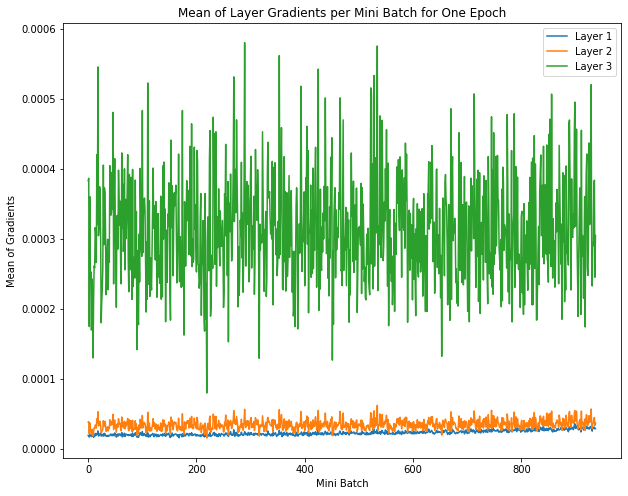


Test set: Average loss: 2.2936, Accuracy: 1000/10000 (10.00%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.279393
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.289881
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.253723
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2.307328
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.259277
Train Epoch: 1 [32000/60000 (53%)]	Loss: 2.246016
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.221884
Train Epoch: 1 [44800/60000 (75%)]	Loss: 2.213123
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.149405
Train Epoch: 1 [57600/60000 (96%)]	Loss: 2.022285

Training set: Accuracy: 11074/60000 (18.46%)



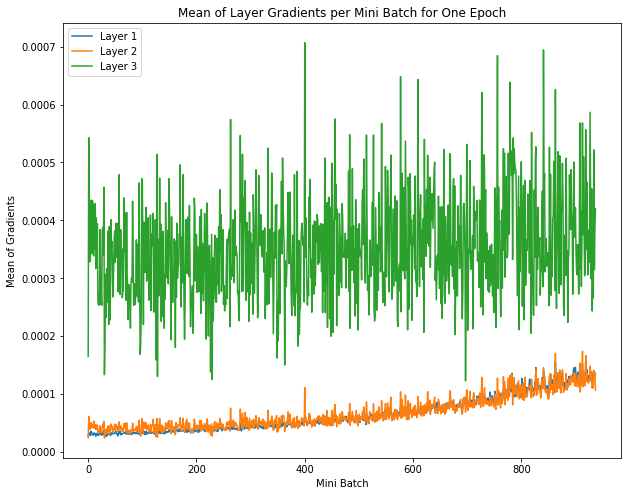


Test set: Average loss: 1.9972, Accuracy: 2678/10000 (26.78%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 1.969016
Train Epoch: 2 [6400/60000 (11%)]	Loss: 1.885771
Train Epoch: 2 [12800/60000 (21%)]	Loss: 1.788684
Train Epoch: 2 [19200/60000 (32%)]	Loss: 1.678800
Train Epoch: 2 [25600/60000 (43%)]	Loss: 1.612635
Train Epoch: 2 [32000/60000 (53%)]	Loss: 1.602517
Train Epoch: 2 [38400/60000 (64%)]	Loss: 1.593467
Train Epoch: 2 [44800/60000 (75%)]	Loss: 1.459122
Train Epoch: 2 [51200/60000 (85%)]	Loss: 1.429931
Train Epoch: 2 [57600/60000 (96%)]	Loss: 1.376564

Training set: Accuracy: 23490/60000 (39.15%)



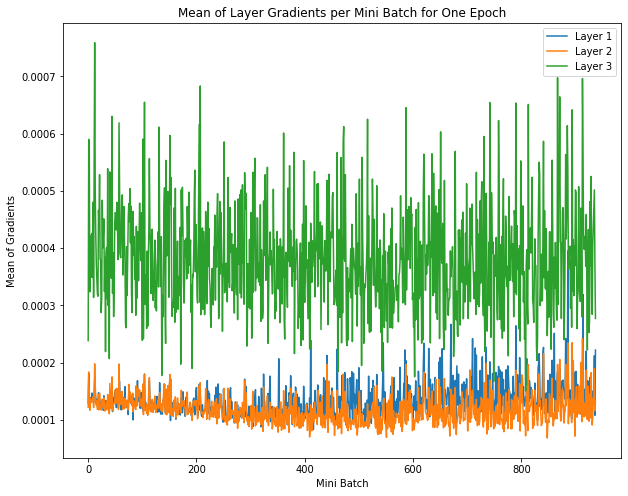


Test set: Average loss: 1.3572, Accuracy: 4990/10000 (49.90%)

<<< ReLU >>>

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.289348
Train Epoch: 0 [6400/60000 (11%)]	Loss: 1.104553
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.697895
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.791031
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.742733
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.478589
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.376679
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.469520
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.525800
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.583153

Training set: Accuracy: 44332/60000 (73.89%)



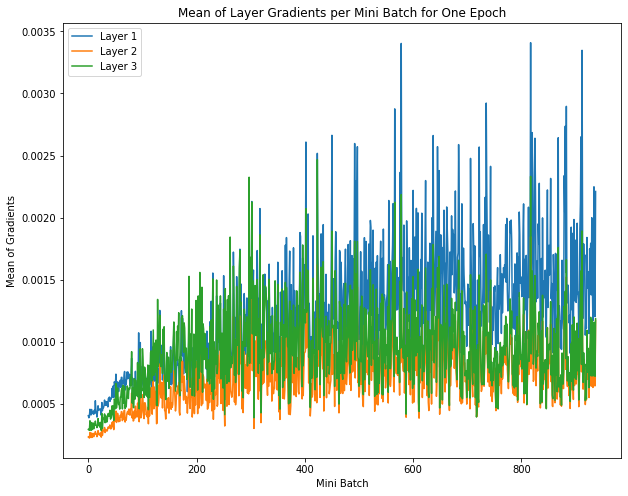


Test set: Average loss: 0.5161, Accuracy: 8146/10000 (81.46%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.788742
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.326175
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.400220
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.426536
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.417804
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.580977
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.290349
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.556341
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.318323
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.314964

Training set: Accuracy: 50486/60000 (84.14%)



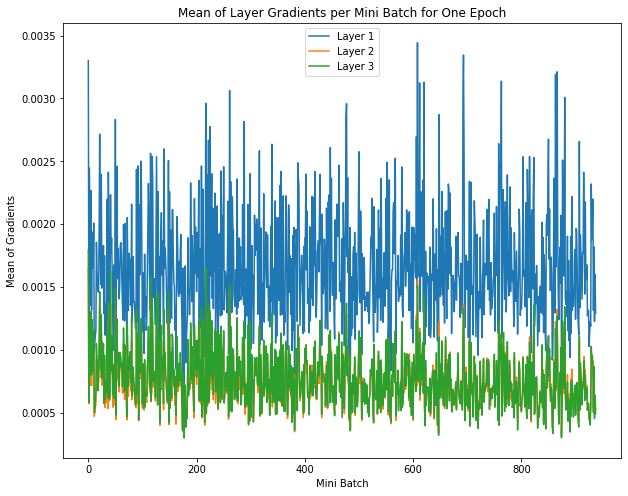


Test set: Average loss: 0.4571, Accuracy: 8303/10000 (83.03%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.653285
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.499870
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.410307
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.285879
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.270098
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.398705
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.357607
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.363476
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.567921
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.397477

Training set: Accuracy: 51576/60000 (85.96%)



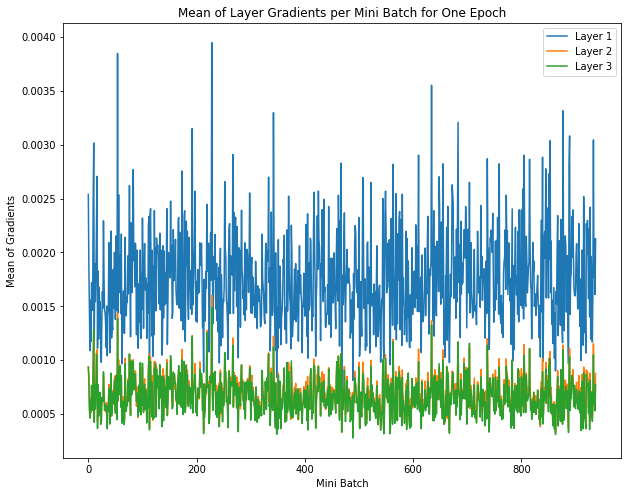


Test set: Average loss: 0.3974, Accuracy: 8551/10000 (85.51%)



In [19]:
def plot_gradients(grads):
    plt.figure(figsize=(10,8))
    for i in range(len(grads)):
        plt.plot(grads[i], label='Layer {}'.format(i+1)) 
    plt.title('Mean of Layer Gradients per Mini Batch for One Epoch')
    plt.legend()
    plt.xlabel('Mini Batch')
    plt.ylabel('Mean of Gradients')
    plt.show()
    
print("<<< Sigmoid >>>\n")
model = ANN_sigmoid(input_dim, output_dim).to(device)

#please use only predefined variables names
optimizer =  optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum) #define SGD optimizer
epochs_range = range(3) #range you will iterate over

for epoch in epochs_range:
    grads1_list, grads2_list, grads3_list = train(args, model, device, train_loader, optimizer, epoch)
    
    #plot here together 3 different magnitudes
#     plt.figure(figsize=(16,9))
    plot_gradients([grads1_list, grads2_list, grads3_list])
    #now test your model
    test(args, model, device, test_loader)
######################################################################################    
print("<<< ReLU >>>\n")
model = ANN_relu(input_dim, output_dim).to(device) #define your ReLU model
optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum) #redefine SGD optimizer

for epoch in epochs_range:
    #repeat operations of the loop above, but for ReLU model
    grads1_list, grads2_list, grads3_list = train(args, model, device, train_loader, optimizer, epoch)
    plot_gradients([grads1_list, grads2_list, grads3_list])
    test(args, model, device, test_loader)

<h3 style="color:rgb(210,90,80)">Question (10 points):</h3>

What observations for the sigmoid network and the ReLU network can you make? Tick the correct boxes (several may be correct):

a_)  The sigmoid network trains poorly in only one epoch. <br>
b_)  The means of magnitudes of the gradients for the sigmoid network are significantly higher for lower layers. This is an indication of the vanishing gradient problem. <br>
c_) One reason why the sigmoid network can lead to vanishing gradients might be that the derivative of the sigmoid does not exceed 1/4. <br>
d_)  When you use the ReLU activation function, the resulting network trains well in only one epoch. <br>
e_) One reason why several well-known activation functions different from sigmoid can lead to more stable training can be the fact that their derivatives are always larger than 1.

To answer the question, assign "True" or "False" boolean values to variables in the next cell. A non-correctly answered question yields negative points and no answer (i.e. answer “None”) gives 0 points for a question. More details on grading can be found in the [FAQ sheet](https://docs.google.com/document/d/11ccAoEWh1APAoj79kGFiL64_7OL7RApPUHJ2-cvS2s0/edit?usp=sharing).<br>
<b>Note:</b> Do not reuse these variable names. They are used for testing.

In [20]:
#your answers go here ↓↓↓
a_=True
b_=False
c_=True
d_=True
e_=False

Note, however, there are possible ways to improve the learning of the sigmoid network without changing the activation function and the network size (you are encouraged to make an educated guess and try out several choices), but still, the network archictecture seems to be too simple to really lead to a satisfying performance. In the upcoming assignment, we will further ellaborate on this issue.